In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
from pandas import read_csv
red = read_csv(url, sep=";")
red['color'] = 1
red.head(n=2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1


In [3]:
red.tail(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,1


In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
white = read_csv(url, sep=";")
white['color'] = 0
white.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,0


In [5]:
red.shape, white.shape

((1599, 13), (4898, 13))

In [6]:
import os
os.getcwd()

'C:\\xavierdupre\\__home_\\GitHub\\papierstat\\_doc\\notebooks'

Voici une formule : $f(x) = \frac{x^2 + 3x - 5}{3}$

In [7]:
import pandas
wines = pandas.concat([red, white])
wines.shape, white.shape, red.shape

((6497, 13), (4898, 13), (1599, 13))

In [8]:
wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [9]:
X = wines.drop('quality', axis=1)
X.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1


In [10]:
y = wines["quality"]

In [11]:
%matplotlib inline

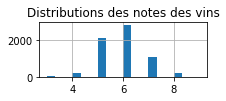

In [12]:
ax = y.hist(bins=18, figsize=(3,1))
ax.set_title("Distributions des notes des vins");

In [13]:
from sklearn.linear_model import LinearRegression
clr = LinearRegression()
clr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
pred = clr.predict(X)

In [15]:
from sklearn.metrics import r2_score
r2_score(y, pred)

0.29213688504020474

In [16]:
from sklearn.tree import DecisionTreeRegressor
cltree = DecisionTreeRegressor()
cltree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [17]:
pred_tree = cltree.predict(X)
r2_score(y, pred_tree)

1.0

In [18]:
from sklearn import __version__
__version__

'0.19.1'

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [20]:
X_train.shape, y_train.shape

((5847, 11), (5847,))

In [21]:
cltree.fit(X_train, y_train)
pred_tree = cltree.predict(X_test)
r2_score(y_test, pred_tree)

0.09859171988215376

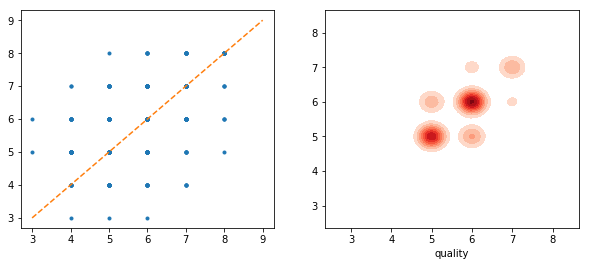

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(y_test, pred_tree, '.')
ax[0].plot([3,9], [3,9], '--')
import seaborn
seaborn.kdeplot(y_test, pred_tree,
                 cmap="Reds", shade=True, shade_lowest=False, ax=ax[1]);

Text(0.5,1,'Vins')

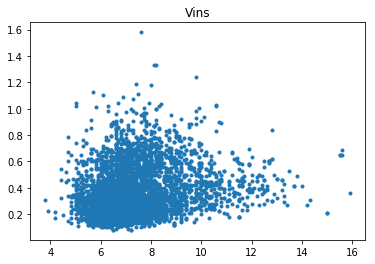

In [23]:
fig, ax = plt.subplots()
ax.plot(X.iloc[:, 0], X.iloc[:, 1], '.')
ax.set_title('Vins')

In [24]:
type(X)

pandas.core.frame.DataFrame

In [25]:
mat = X.as_matrix()
type(mat)

numpy.ndarray

In [26]:
mat[2:10:2, 4:6]

array([[ 0.092, 15.   ],
       [ 0.076, 11.   ],
       [ 0.069, 15.   ],
       [ 0.073,  9.   ]])

In [27]:
X.iloc[2:10:2, 4:6]

,chlorides,free sulfur dioxide
2,0.092,15.0
4,0.076,11.0
6,0.069,15.0
8,0.073,9.0


NotImplementedError: iLocation based boolean indexing on an integer type is not available

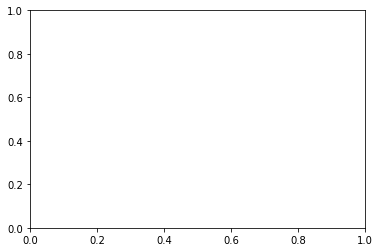

In [28]:
fig, ax = plt.subplots()
ax.plot(X.iloc[y==3, 0], X.iloc[:, 1], '.')
ax.set_title('Vins')

In [29]:
col1,col2 = X.columns[0], X.columns[1]
col1,col2

('fixed acidity', 'volatile acidity')

In [30]:
col1 = X.columns[0]
col2 = X.columns[1]
col1,col2

('fixed acidity', 'volatile acidity')

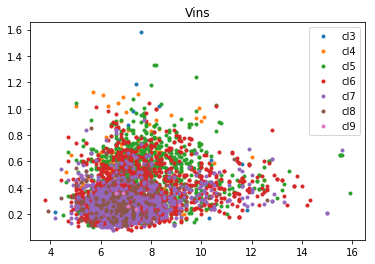

In [31]:
fig, ax = plt.subplots()
# ax.plot(X.loc[y==3, col1], X.loc[y==3, col2], '.', label="cl3")
for cl in range(3, 10):
    ax.plot(X.loc[y==cl, col1], X.loc[y==cl, col2], 
            '.', label="cl%d" % cl)
ax.set_title('Vins')
ax.legend();

In [32]:
from sklearn.decomposition import PCA
pca = PCA()

In [33]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [34]:
Xp = pca.transform(X)

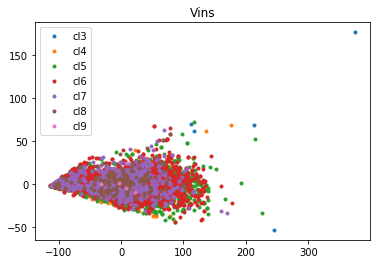

In [35]:
fig, ax = plt.subplots()
for cl in range(3, 10):
    ax.plot(Xp[y==cl, 0], Xp[y==cl, 1], 
            '.', label="cl%d" % cl)
ax.set_title('Vins')
ax.legend();

In [36]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA()
kpca.fit(X)

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=None, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0)

In [37]:
kXp = kpca.transform(X)

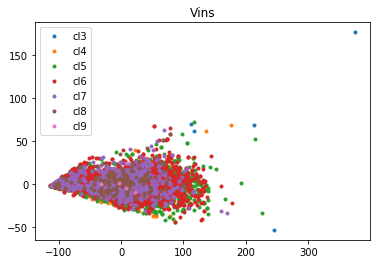

In [38]:
fig, ax = plt.subplots()
for cl in range(3, 10):
    ax.plot(kXp[y==cl, 0], kXp[y==cl, 1], 
            '.', label="cl%d" % cl)
ax.set_title('Vins')
ax.legend();

In [39]:
from sklearn.manifold import TSNE
tsne = TSNE()

In [40]:
tsne.fit(X.iloc[::10,:], y)

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=None, verbose=0)

In [41]:
xtsne = tsne.fit_transform(X.iloc[::10,:], y)

In [42]:
xtsne.shape

(650, 2)

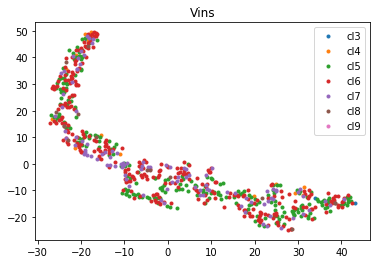

In [43]:
fig, ax = plt.subplots()
for cl in range(3, 10):
    ax.plot(xtsne[y[::10]==cl, 0], xtsne[y[::10]==cl, 1], 
            '.', label="cl%d" % cl)
ax.set_title('Vins')
ax.legend();

In [44]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [45]:
X2 = X.drop('color', axis=1)
Y2 = X['color']

In [46]:
xtsne = tsne.fit_transform(X2.iloc[::10,:], Y2)

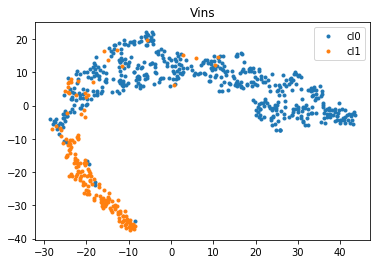

In [47]:
fig, ax = plt.subplots()
for cl in range(0, 2):
    ax.plot(xtsne[Y2[::10]==cl, 0], xtsne[Y2[::10]==cl, 1], 
            '.', label="cl%d" % cl)
ax.set_title('Vins')
ax.legend();

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                X2, Y2)

In [49]:
X2.shape, Y2.shape

((6497, 11), (6497,))

In [50]:
from sklearn.linear_model import LogisticRegression
clr = LogisticRegression()
clr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
pred = clr.predict(X_test)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1220
          1       0.98      0.96      0.97       405

avg / total       0.99      0.99      0.99      1625



In [53]:
proba = clr.predict_proba(X_test)
proba[:5]

array([[9.99734473e-01, 2.65527244e-04],
       [9.92719070e-01, 7.28092965e-03],
       [9.81635743e-01, 1.83642571e-02],
       [9.90298859e-01, 9.70114135e-03],
       [9.97054718e-01, 2.94528163e-03]])

In [54]:
from sklearn.metrics import roc_curve
fpr, tpr, th1 = roc_curve(y_test, proba[:, 1])
from sklearn.metrics import precision_recall_curve
prec, rec, th2 = precision_recall_curve(y_test, proba[:, 1])

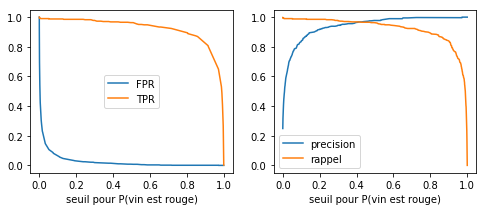

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(8,3))
ax[0].plot(th1, fpr, label="FPR")
ax[0].plot(th1, tpr, label="TPR")
ax[0].set_xlabel("seuil pour P(vin est rouge)")
ax[0].legend()
ax[1].plot(th2, prec[1:], label="precision")
ax[1].plot(th2, rec[1:], label="rappel")
ax[1].set_xlabel("seuil pour P(vin est rouge)")
ax[1].legend();

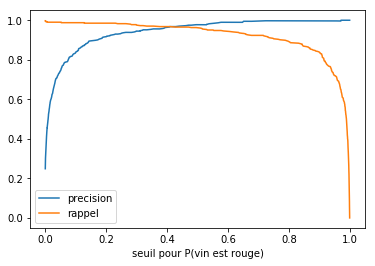

In [56]:
fig, ax = plt.subplots(1, 1)
ax.plot(th, prec[1:], label="precision")
ax.plot(th, rec[1:], label="rappel")
ax.set_xlabel("seuil pour P(vin est rouge)")
ax.legend();

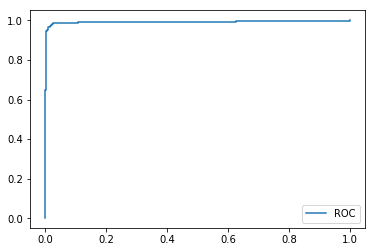

In [57]:
fig, ax = plt.subplots(1, 1)
ax.plot(fpr, tpr, label="ROC")
ax.legend();

## notes

In [58]:
X = wines.drop('quality', axis=1)
y = wines["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [59]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(min_samples_leaf=10)
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [60]:
pred = reg.predict(X_test)
r2_score(y_test, pred)

0.3906718624995472

In [61]:
values = []
r2 = []
for val in range(1, 20):
    reg = RandomForestRegressor(min_samples_leaf=val)
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    sc = r2_score(y_test, pred)
    values.append(val)
    r2.append(sc)

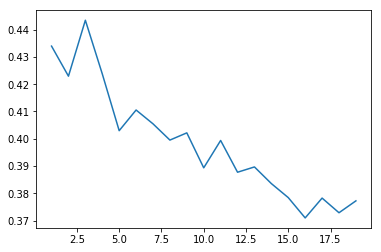

In [62]:
fig, ax = plt.subplots(1, 1)
ax.plot(values, r2)

In [63]:
values = []
r2 = []
for val in range(1, 50, 2):
    reg = RandomForestRegressor(min_samples_leaf=3, n_estimators=val)
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    sc = r2_score(y_test, pred)
    values.append(val)
    r2.append(sc)

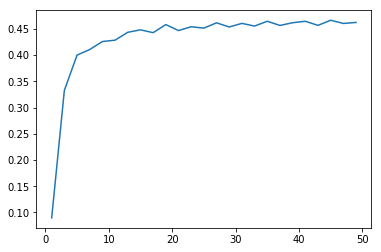

In [64]:
fig, ax = plt.subplots(1, 1)
ax.plot(values, r2)

In [65]:
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()
parameters = {'n_estimators':list(range(5, 50, 5)), 
              'max_depth':list(range(3, 8))}
grid = GridSearchCV(cv=5, estimator=model, 
                    param_grid=parameters, verbose=1)

In [66]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:   41.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45], 'max_depth': [3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [67]:
pred = grid.predict(X_test)
r2_score(y_test, pred)

0.3705457781334923

In [68]:
import numpy
mat = numpy.array([[2*i**x for i in range(5)] for x in [0.4, 0.5]])
mat

array([[0.        , 2.        , 2.63901582, 3.10369115, 3.48220225],
       [0.        , 2.        , 2.82842712, 3.46410162, 4.        ]])

In [69]:
rnd = numpy.random.permutation(5)
rnd

array([4, 2, 1, 3, 0])

In [70]:
mat[:, rnd]

array([[3.48220225, 2.63901582, 2.        , 3.10369115, 0.        ],
       [4.        , 2.82842712, 2.        , 3.46410162, 0.        ]])